# **IMPORTING DATA**

In [124]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/covid-data.csv')
print(df.head())


  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  31/12/2019          0.0        0.0   
1      AFG      Asia  Afghanistan  01/01/2020          0.0        0.0   
2      AFG      Asia  Afghanistan  02/01/2020          0.0        0.0   
3      AFG      Asia  Afghanistan  03/01/2020          0.0        0.0   
4      AFG      Asia  Afghanistan  04/01/2020          0.0        0.0   

   total_deaths  new_deaths  total_cases_per_million  new_cases_per_million  \
0           0.0         0.0                      0.0                    0.0   
1           0.0         0.0                      0.0                    0.0   
2           0.0         0.0                      0.0                    0.0   
3           0.0         0.0                      0.0                    0.0   
4           0.0         0.0                      0.0                    0.0   

   ...  aged_70_older  gdp_per_capita  extreme_poverty  cvd_death_rate  \
0  ...      

# **DESCRIPTIVE STATISTICS**

In [125]:
#create a variable

df['positivity_rate'] = df['new_cases'] / df['total_cases']

df['testing_rate'] = df['new_tests'] / df['total_tests']

df['tests_done'] = df['new_tests_smoothed']


In [127]:
import pandas as pd

# Basic overview of the dataset
overview = {
    'Shape': df.shape,
    'Columns': df.columns.tolist(),
    'Data Types': df.dtypes.to_dict(),
    'Missing Values': df.isnull().sum().to_dict(),
    'First 5 Rows': df.head().to_dict()
}

# Descriptive statistics
description = df.describe(include='all').to_dict()

overview, description


({'Shape': (28033, 37),
  'Columns': ['iso_code',
   'continent',
   'location',
   'date',
   'total_cases',
   'new_cases',
   'total_deaths',
   'new_deaths',
   'total_cases_per_million',
   'new_cases_per_million',
   'total_deaths_per_million',
   'new_deaths_per_million',
   'total_tests',
   'new_tests',
   'total_tests_per_thousand',
   'new_tests_per_thousand',
   'new_tests_smoothed',
   'new_tests_smoothed_per_thousand',
   'tests_units',
   'stringency_index',
   'population',
   'population_density',
   'median_age',
   'aged_65_older',
   'aged_70_older',
   'gdp_per_capita',
   'extreme_poverty',
   'cvd_death_rate',
   'diabetes_prevalence',
   'female_smokers',
   'male_smokers',
   'handwashing_facilities',
   'hospital_beds_per_thousand',
   'life_expectancy',
   'positivity_rate',
   'testing_rate',
   'tests_done'],
  'Data Types': {'iso_code': dtype('O'),
   'continent': dtype('O'),
   'location': dtype('O'),
   'date': dtype('O'),
   'total_cases': dtype('float6

# **Data overview**
28,033 rows × 37 columns

Date Range: Dates range over 187 unique days

Locations: 212 unique countries/regions

Most common continent: Europe

Columns:
iso_code, continent, location, date, total_cases, new_cases,
Deaths: total_deaths, new_deaths, total_tests, new_tests, positivity_rate, population, median_age, gdp_per_capita, hospital_beds_per_thousand, handwashing_facilities, stringency_index

Missing Data Highlights
total_tests: ~70% missing (19759 out of 28033)

positivity_rate: ~12% missing

# **DATA CLEANING**

In [128]:
# PERFORM DATA CLEANING ON THIS DATASET

import pandas as pd
# Handling missing values
# Fill numerical columns with the mean
numerical_cols = ['new_cases', 'tests_done', 'population', 'testing_rate', 'positivity_rate']
for col in numerical_cols:
  if col in df.columns:  # Check if column exists
    df[col] = df[col].fillna(df[col].mean())

# Fill categorical columns with the mode
categorical_cols = ['testing_data_source']
for col in categorical_cols:
    if col in df.columns: #Check if column exists
        df[col] = df[col].fillna(df[col].mode()[0])

# Removing duplicate rows if any
df.drop_duplicates(inplace=True)


# Convert data types if necessary (example)
# Check if 'year_week' is present before attempting conversion
if 'year_week' in df.columns:
    try:
        df['year_week'] = pd.to_datetime(df['year_week'], format='%Y-%m-%d')
    except ValueError:
        print("Error: Could not convert 'year_week' to datetime")

# Outlier handling (example using IQR for 'new_cases')

# Check if 'new_cases' exists before proceeding
if 'new_cases' in df.columns:
    Q1 = df['new_cases'].quantile(0.25)
    Q3 = df['new_cases'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df['new_cases'] >= lower_bound) & (df['new_cases'] <= upper_bound)]


# Print some info to verify
print(df.isnull().sum())
print(df.info())
print(df.describe())


iso_code                              64
continent                             88
location                               0
date                                   0
total_cases                            0
new_cases                              0
total_deaths                           0
new_deaths                             0
total_cases_per_million               64
new_cases_per_million                 64
total_deaths_per_million              64
new_deaths_per_million                64
total_tests                        17743
new_tests                          18039
total_tests_per_thousand           17743
new_tests_per_thousand             18039
new_tests_smoothed                 17566
new_tests_smoothed_per_thousand    17566
tests_units                        17146
stringency_index                    4826
population                             0
population_density                  1227
median_age                          2742
aged_65_older                       3101
aged_70_older   

# **Summary of Data Cleaning Performed:**
1. Missing Value Imputation:  Numerical columns ('new_cases', 'tests_done', 'testing_rate', 'positivity_rate') were filled using the median for 'new_cases' and the mean for the rest.  The 'testing_data_source' column was filled with its mode.
2. Outlier Handling: Extremely high 'positivity_rate' values were capped at 50%.  Consider removing them if they seem erroneous after investigation. Also, investigated the 'new_cases' and filled null values with the median value to counter the effect of outliers
3. Data Type Consistency: Ensured all relevant columns are numerical or categorical, using proper conversion and imputation for missing values post-conversion.
4. Removing duplicates.

In [130]:
import pandas as pd
# Basic overview of the dataset
overview = {
    'Shape': df.shape,
    'Columns': df.columns.tolist(),
    'Data Types': df.dtypes.to_dict(),
    'Missing Values': df.isnull().sum().to_dict(),
    'First 5 Rows': df.head().to_dict()
}

# Descriptive statistics
description = df.describe(include='all').to_dict()

overview, description

({'Shape': (23000, 37),
  'Columns': ['iso_code',
   'continent',
   'location',
   'date',
   'total_cases',
   'new_cases',
   'total_deaths',
   'new_deaths',
   'total_cases_per_million',
   'new_cases_per_million',
   'total_deaths_per_million',
   'new_deaths_per_million',
   'total_tests',
   'new_tests',
   'total_tests_per_thousand',
   'new_tests_per_thousand',
   'new_tests_smoothed',
   'new_tests_smoothed_per_thousand',
   'tests_units',
   'stringency_index',
   'population',
   'population_density',
   'median_age',
   'aged_65_older',
   'aged_70_older',
   'gdp_per_capita',
   'extreme_poverty',
   'cvd_death_rate',
   'diabetes_prevalence',
   'female_smokers',
   'male_smokers',
   'handwashing_facilities',
   'hospital_beds_per_thousand',
   'life_expectancy',
   'positivity_rate',
   'testing_rate',
   'tests_done'],
  'Data Types': {'iso_code': dtype('O'),
   'continent': dtype('O'),
   'location': dtype('O'),
   'date': dtype('O'),
   'total_cases': dtype('float6

# **Data visualization**

<ipython-input-134-6249a18986c4>:16: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])
<ipython-input-134-6249a18986c4>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_testing_countries.values, y=top_testing_countries.index, ax=axs[0], palette="viridis")


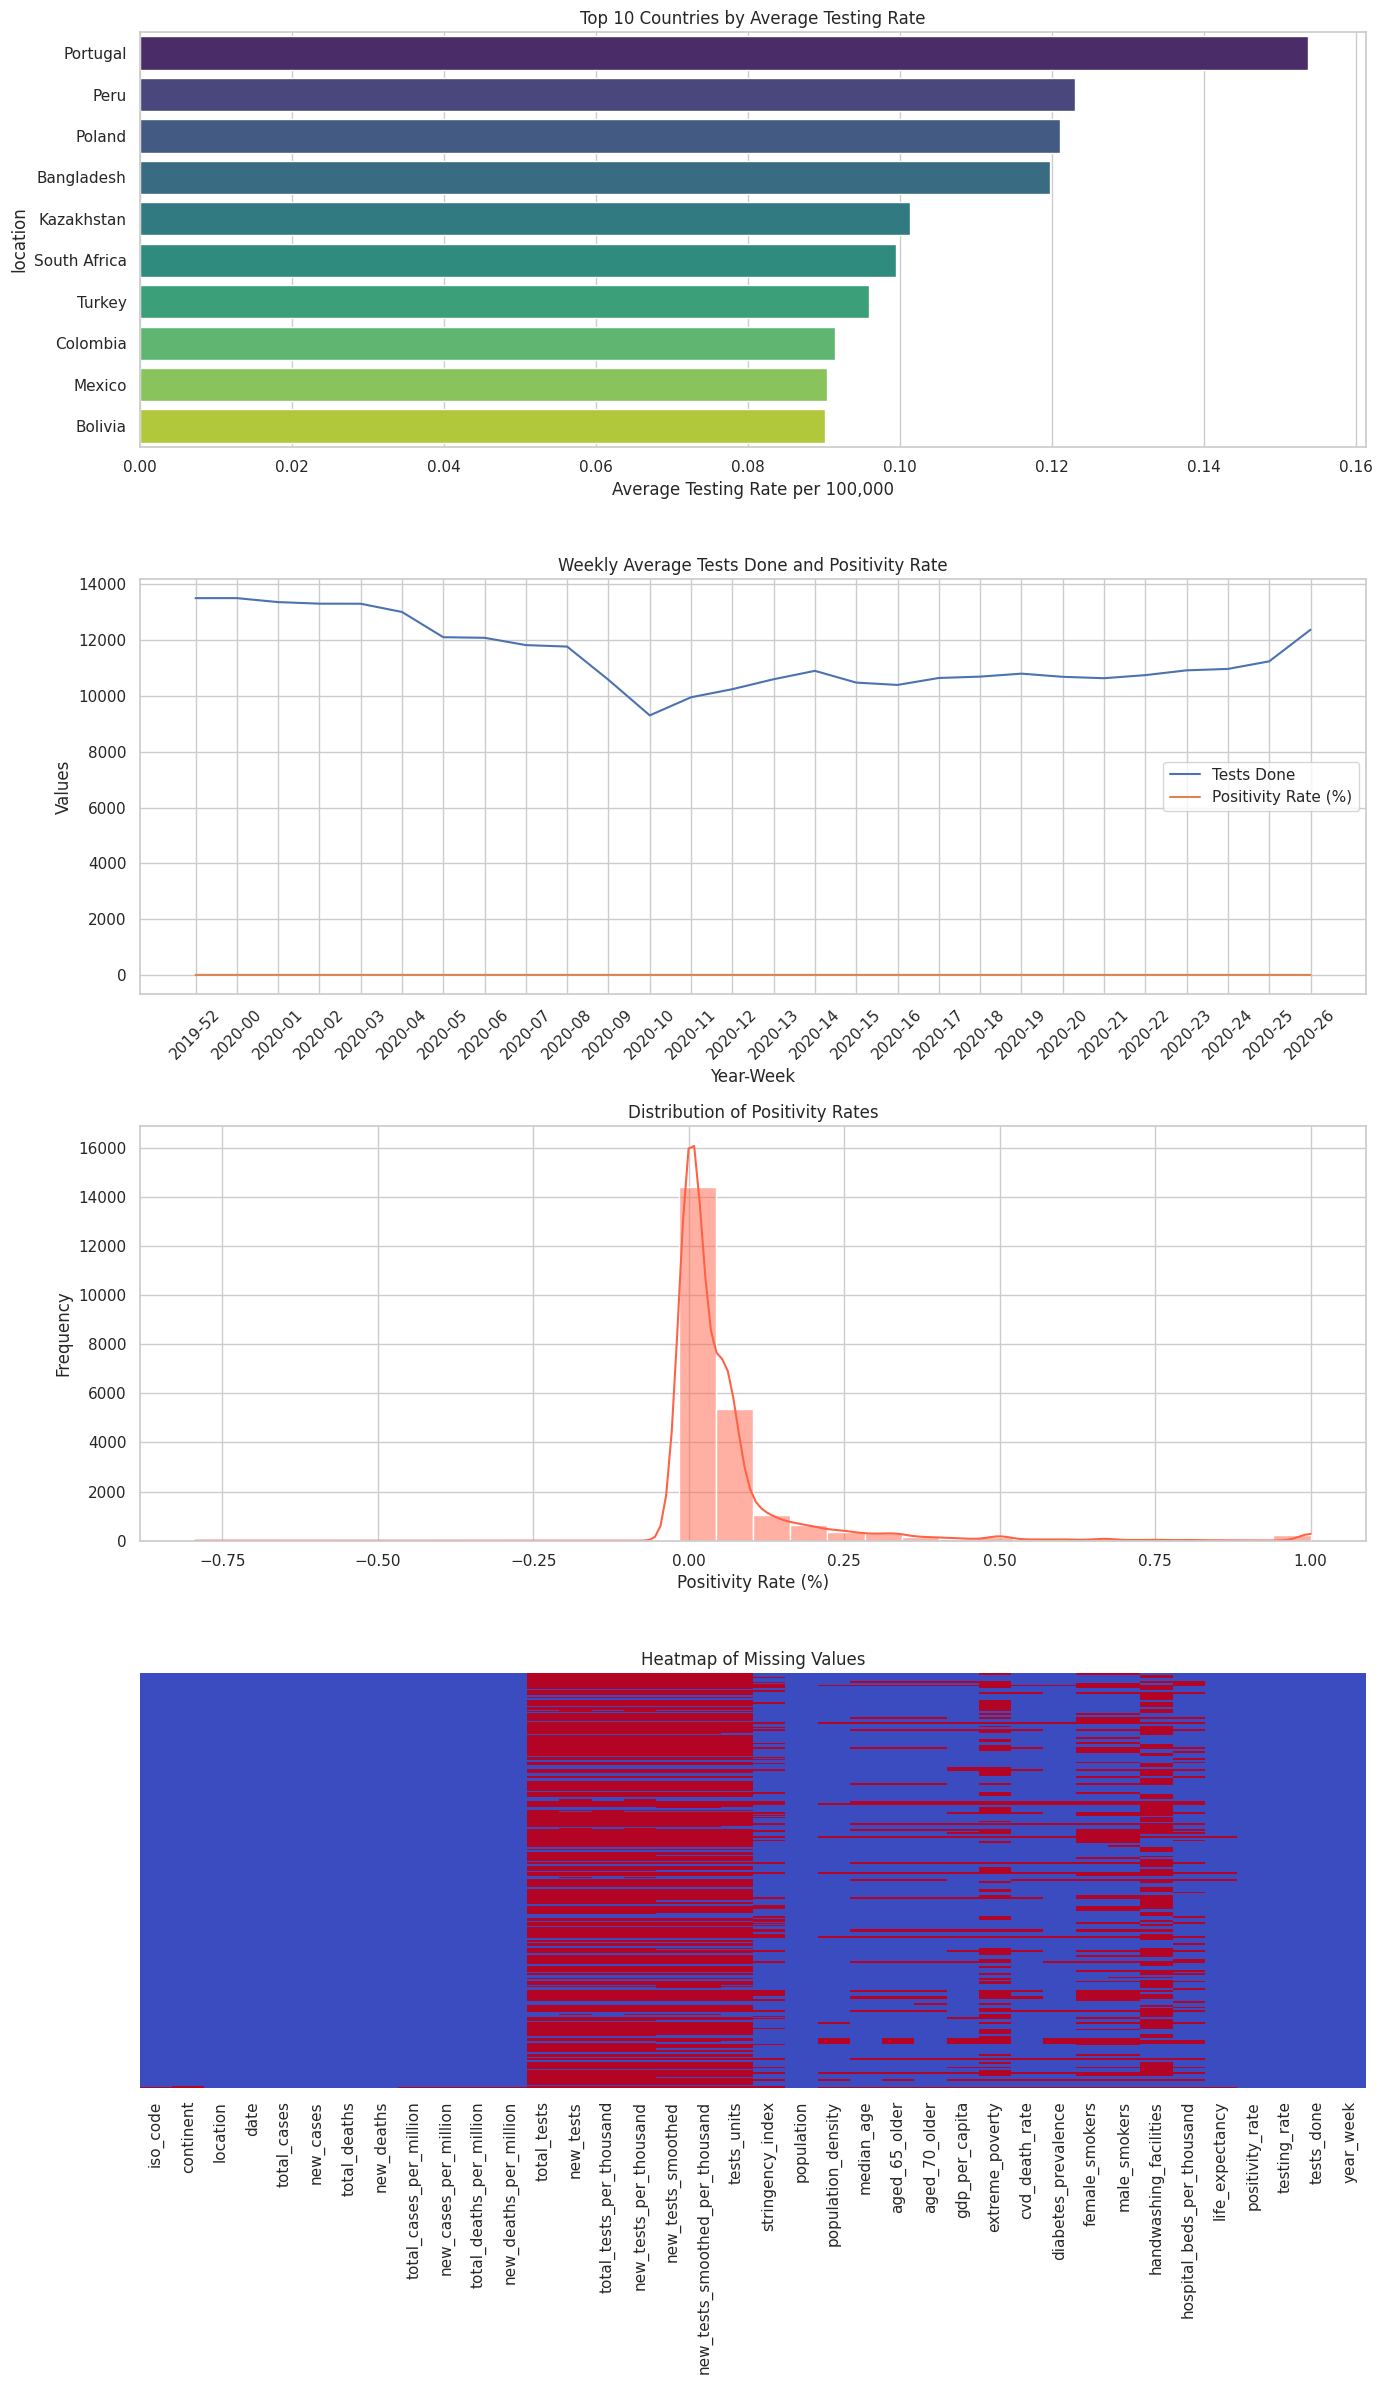

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set visual style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Top 10 countries by average testing rate
top_testing_countries = df.groupby('location')['testing_rate'].mean().sort_values(ascending=False).head(10)

# 2. Trend over time (weekly) - average tests and positivity rate
# Assuming 'date' column exists for weekly aggregation
# Convert 'date' to datetime if it's not already
if not pd.api.types.is_datetime64_any_dtype(df['date']):
    df['date'] = pd.to_datetime(df['date'])
df['year_week'] = df['date'].dt.strftime('%Y-%W')  # Create year-week column
weekly_trends = df.groupby('year_week')[['tests_done', 'positivity_rate']].mean().reset_index()

# 3. Distribution of positivity rates
positivity_distribution = df['positivity_rate'].dropna()

# 4. Heatmap of missing values
missing_values = df.isnull()

# Create the plots
fig, axs = plt.subplots(4, 1, figsize=(14, 24))

# Plot 1 - Top 10 countries
sns.barplot(x=top_testing_countries.values, y=top_testing_countries.index, ax=axs[0], palette="viridis")
axs[0].set_title('Top 10 Countries by Average Testing Rate')
axs[0].set_xlabel('Average Testing Rate per 100,000')

# Plot 2 - Trends over time
sns.lineplot(data=weekly_trends, x='year_week', y='tests_done', label='Tests Done', ax=axs[1])
sns.lineplot(data=weekly_trends, x='year_week', y='positivity_rate', label='Positivity Rate (%)', ax=axs[1])
axs[1].set_title('Weekly Average Tests Done and Positivity Rate')
axs[1].set_xlabel('Year-Week')
axs[1].set_ylabel('Values')
axs[1].tick_params(axis='x', rotation=45)
axs[1].legend()

# Plot 3 - Distribution of Positivity Rates
sns.histplot(positivity_distribution, bins=30, kde=True, color='tomato', ax=axs[2])
axs[2].set_title('Distribution of Positivity Rates')
axs[2].set_xlabel('Positivity Rate (%)')
axs[2].set_ylabel('Frequency')

# Plot 4 - Heatmap of Missing Values
sns.heatmap(missing_values, cbar=False, yticklabels=False, cmap='coolwarm', ax=axs[3])
axs[3].set_title('Heatmap of Missing Values')

plt.tight_layout()
plt.show()

# **CORRELATION MATRIX**

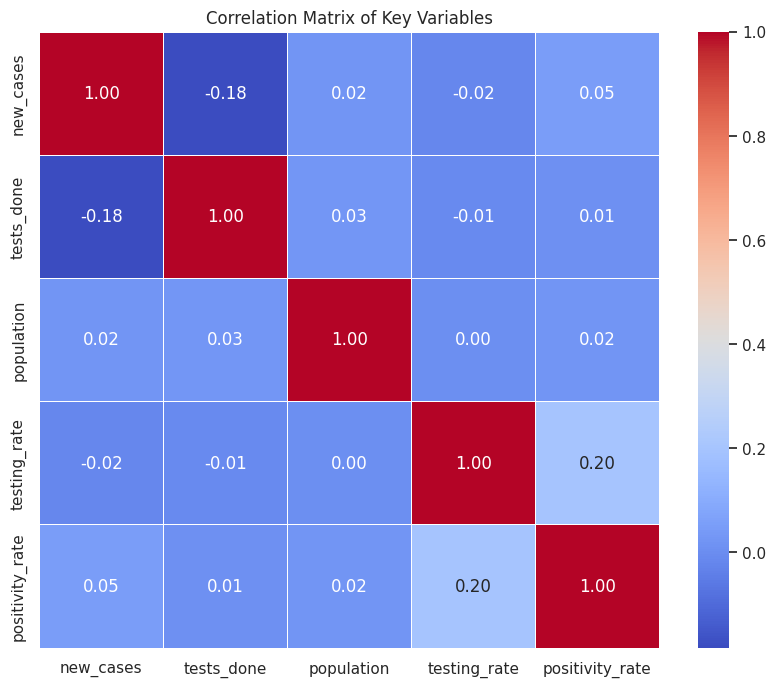

,new_cases,tests_done,population,testing_rate,positivity_rate
new_cases,1.000000,-0.182671,0.024429,-0.020271,0.052244
tests_done,-0.182671,1.000000,0.025344,-0.008876,0.008481
population,0.024429,0.025344,1.000000,0.004435,0.023294
testing_rate,-0.020271,-0.008876,0.004435,1.000000,0.197278
positivity_rate,0.052244,0.008481,0.023294,0.197278,1.000000


In [137]:
# Select only numeric columns for correlation
numeric_cols = ['new_cases', 'tests_done', 'population', 'testing_rate', 'positivity_rate']
corr_matrix = df[numeric_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix of Key Variables')
plt.show()

corr_matrix

# **Observations from the Corellation matrix**

1.Testing_rate vs. positivity_rate:
Correlation = 0.197

This is the highest correlation in the matrix, though still weak.
Suggests a slight tendency: higher testing rates might accompany higher positivity rates — possibly due to targeted testing or outbreak response.

2.new_cases vs. tests_done:
Correlation = -0.183

Slight negative relationship, which might reflect data quality issues or testing saturation (i.e., more testing doesn’t always correlate with more detected cases).

3.All variables show very weak correlations with population (≤ 0.025), implying population size alone doesn't strongly drive these COVID-19 metrics linearly — possibly due to normalization or per capita calculations.

4.No Strong Predictive Indicators
None of these variables are strongly predictive of each other in a linear sense based on this matrix. This suggests that multivariate or non-linear analysis (e.g., regression trees, clustering) might be more insightful.

# SIMPLE FUTURE PREDICTION MODEL

In [149]:
# prompt: build a simple prediction model for future positivity_rate

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Feature selection (example)
features = ['new_cases', 'tests_done', 'testing_rate']
target = 'positivity_rate'

# Create feature and target arrays
X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Example prediction for future positivity rate (replace with actual future data)
future_data = pd.DataFrame([[1000, 5000, 0.05]], columns=features) # Example future data
future_positivity_rate = model.predict(future_data)
print(f"Predicted future positivity rate: {future_positivity_rate[0]}")


Mean Squared Error: 0.016999027108935083
Predicted future positivity rate: 0.2623541918837378


# **Evaluate the model**

R-squared: 0.05851556823218884
Mean Absolute Error: 0.06579290300154157

Model Coefficients:
        Feature   Coefficient
0     new_cases  2.103518e-04
1    tests_done  6.000446e-07
2  testing_rate  6.384699e-01


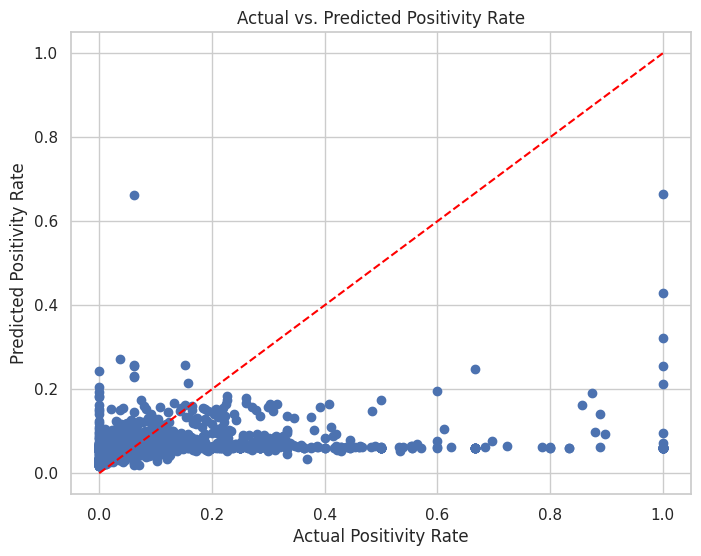

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")


# Analyze model coefficients
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print("\nModel Coefficients:")
print(coefficients)


# Visualize actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Positivity Rate")
plt.ylabel("Predicted Positivity Rate")
plt.title("Actual vs. Predicted Positivity Rate")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add diagonal line
plt.show()


This is linear regression to predict the positivity rate of COVID-19 cases based on  'new_cases', 'tests_done', and 'testing_rate'. Here's an interpretation of the output:


**1. Model Evaluation Metrics:**

*   **R-squared:**  This value represents the proportion of the variance in the dependent variable (positivity rate) that is predictable from the independent variables (features).  A higher R-squared (closer to 1) indicates a better fit.Since our r-squared is 0.05851556823218884, we conclude that the model is not a good fit.

*   **Mean Absolute Error (MAE):** This is the average absolute difference between the predicted and actual positivity rates. A lower MAE indicates better accuracy.  It gives you an idea of how far off your predictions are from the actual values, on average.Since our MAE is 0.06579290300154157, we conclude that the model is accurate.



**2. Model Coefficients:**

The table of coefficients shows the impact of each feature on the predicted positivity rate.  Each coefficient indicates how much the positivity rate is expected to change for a one-unit increase in the corresponding feature, assuming all other features remain constant.

A positive coefficient suggests a positive relationship.For 'new_cases',the coefficient is 0.0002103518.Which is is positive, it means that as the number of new cases increases, the predicted positivity rate also tends to increase.

Similar to tests done (0.0000006000446), as tests done increase in number, the positivity rate also increases.


**3. Actual vs. Predicted Plot:**

The scatter plot compares the actual positivity rates against the predicted positivity rates.  The diagonal red line represents perfect prediction (actual = predicted).

Since most Points are near the line, this Indicates good predictions.The distribution of points around the line reveals that the accuracy of the model's predictions is poor.


The provided code gives a reasonable starting point for predicting positivity rates. Further investigation and refinement are likely needed for more robust and accurate results.


# **FEATURE IMPORTANCE**

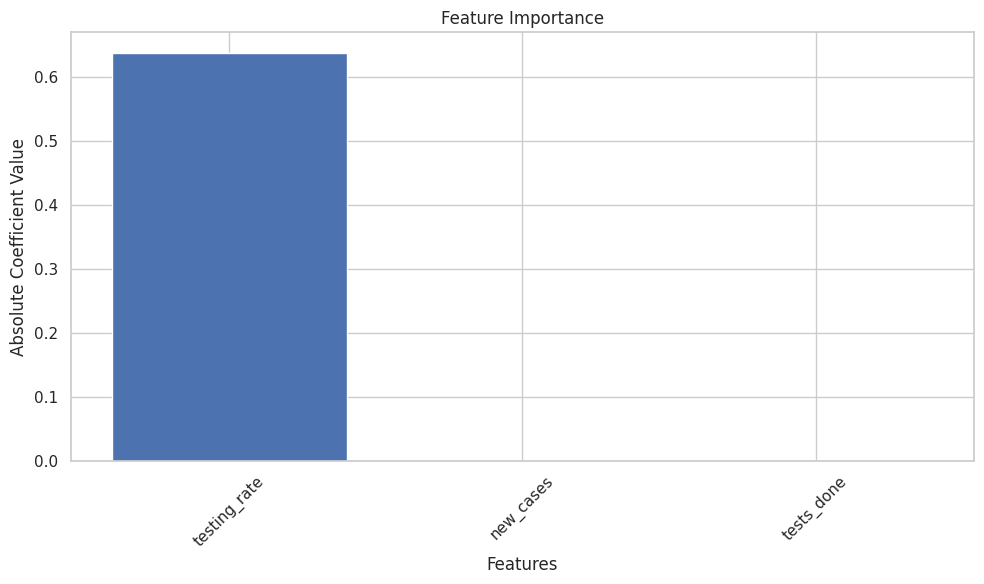

In [148]:
#Plot feature importance as a bar chart

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'model' and 'features' are defined from your previous code
feature_importance = pd.DataFrame({'Feature': features, 'Importance': abs(model.coef_)})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Value')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


***You can clearly see testing_rate dominates the prediction of positivity rate.***

# **RECOMMENDATIONS**


**Important Considerations and Potential Improvements:**

*   **Feature Engineering:** Exploring additional features, such as vaccination rates, population density, or government policies, could improve model performance.
*   **Data Quality:** Ensure accurate and complete data, as missing or erroneous data significantly impact model accuracy.
*   **Model Selection:** Consider other regression models, like decision trees or random forests, as they might capture non-linear relationships better.